# 05 Example - Function Scans

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices, and adds a calculated value vsum
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1 = devices.v1.voltage
    d.v2 = devices.v2.voltage

    d.vsum = d.v1 + d.v2
    
    return d

## Define a function for FunctionScan

In [4]:
def sin_voltage(value):
    devices.v1.voltage = np.sin(10*value) + 1

## Experiments

### 1. 1D Scan with scan0 as FunctionScan

In [5]:
# Setup runinfo with scan0 as FunctionScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.FunctionScan(sin_voltage, ps.drange(0, 0.01, 1), dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.run()

sleep(1)

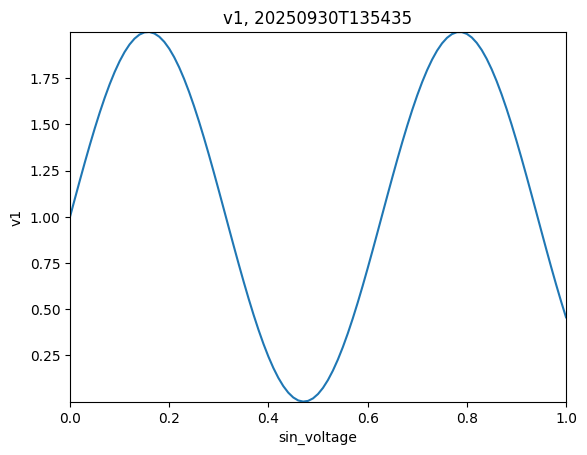

In [6]:
ps.live_plot1D(expt, data_name="v1")

### 2. 2D Scan with scan0 as FunctionScan

In [7]:
# Setup runinfo with scan0 as FunctionScan and scan1 as PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.FunctionScan(sin_voltage, ps.drange(0, 0.01, 1), dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 5)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


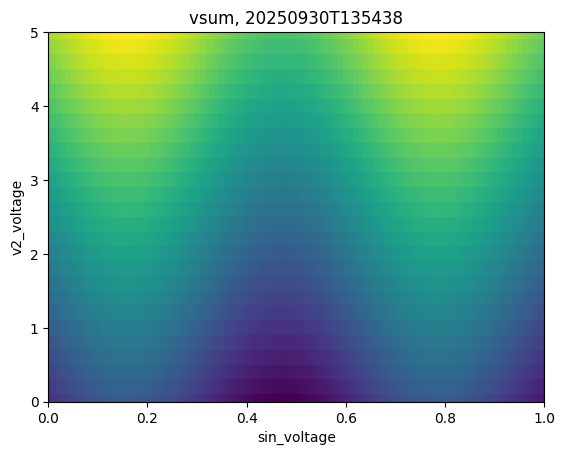

In [8]:
ps.live_plot2D(expt, data_name="vsum")